In [29]:
import yfinance as yf

In [30]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [31]:
stock = "GOOG"
google_data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [32]:
google_data.head()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2005-01-31,4.854795,4.873159,4.758006,4.806897,385306832
2005-02-01,4.762473,4.880605,4.730955,4.824020,756384528
2005-02-02,5.111406,5.380427,5.054326,5.349406,1316889593
2005-02-03,5.233012,5.295305,5.107684,5.112151,521471303
2005-02-04,5.071699,5.155829,5.028019,5.124064,594993855


In [33]:
google_data.shape

(5032, 5)

In [34]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5032 entries, 2005-01-31 to 2025-01-29
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, GOOG)   5032 non-null   float64
 1   (High, GOOG)    5032 non-null   float64
 2   (Low, GOOG)     5032 non-null   float64
 3   (Open, GOOG)    5032 non-null   float64
 4   (Volume, GOOG)  5032 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 235.9 KB


In [35]:
google_data.isna().sum()

Price   Ticker
Close   GOOG      0
High    GOOG      0
Low     GOOG      0
Open    GOOG      0
Volume  GOOG      0
dtype: int64

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of google data')

<Figure size 800x500 with 0 Axes>

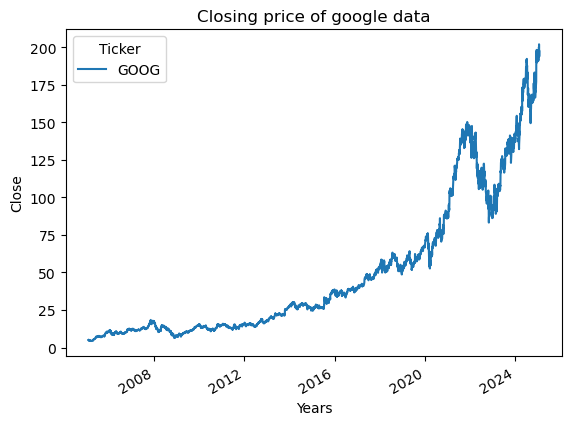

In [37]:
plt.figure(figsize = (8,5))
google_data['Close'].plot()
plt.xlabel("Years")
plt.ylabel("Close")
plt.title("Closing price of google data")


In [38]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of google data")

In [39]:
google_data.columns

MultiIndex([( 'Close', 'GOOG'),
            (  'High', 'GOOG'),
            (   'Low', 'GOOG'),
            (  'Open', 'GOOG'),
            ('Volume', 'GOOG')],
           names=['Price', 'Ticker'])

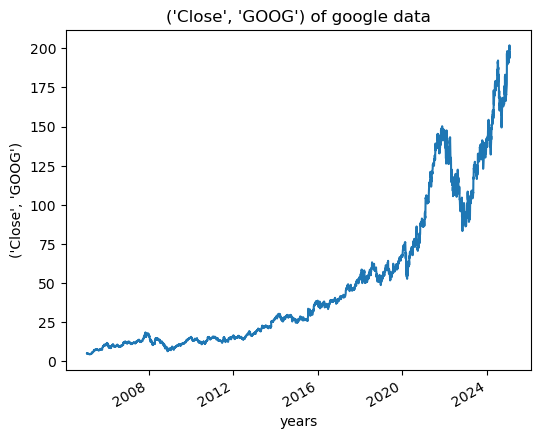

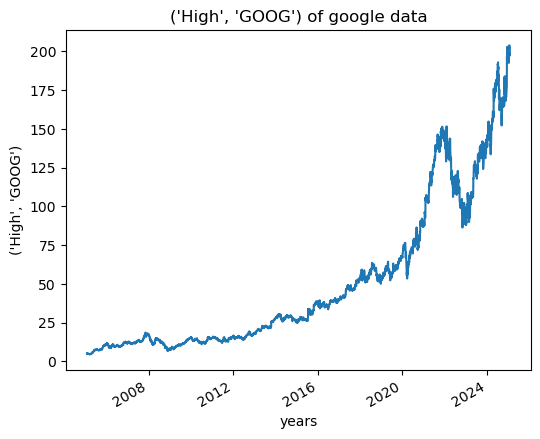

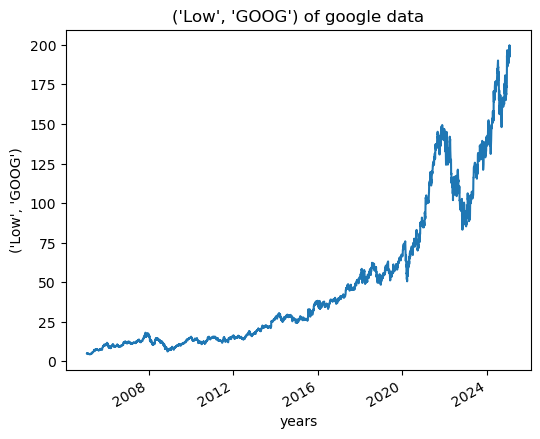

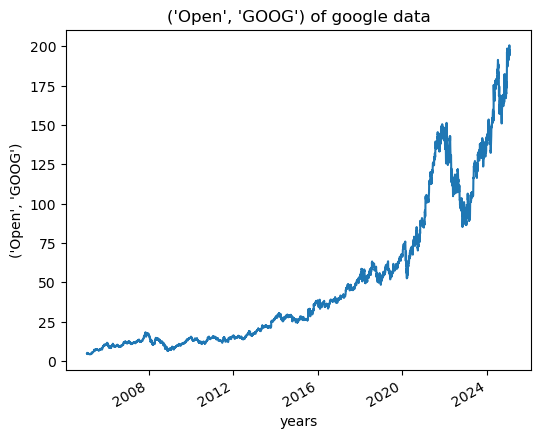

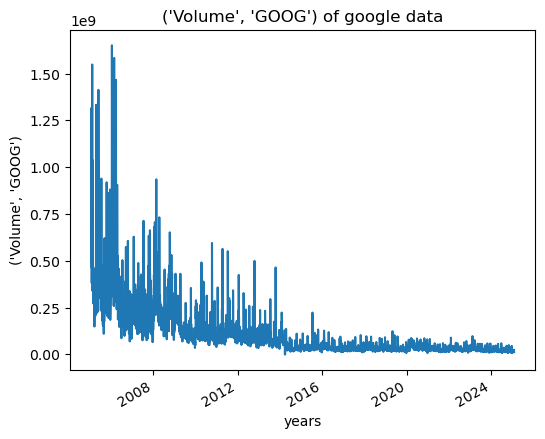

In [40]:
for column in google_data.columns:
    plot_graph((6,5),google_data[column], column)

In [41]:
import pandas as pd

for i in range(2004,2026):
    print(i,list(google_data.index.year).count(i))

2004 0
2005 233
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 252
2025 18


In [42]:
google_data['MA_for_250_days'] = google_data['Close'].rolling(250).mean()

In [43]:
google_data['MA_for_250_days']

Date
2005-01-31           NaN
2005-02-01           NaN
2005-02-02           NaN
2005-02-03           NaN
2005-02-04           NaN
                 ...    
2025-01-23    167.999672
2025-01-24    168.194913
2025-01-27    168.357035
2025-01-28    168.528172
2025-01-29    168.706884
Name: MA_for_250_days, Length: 5032, dtype: float64

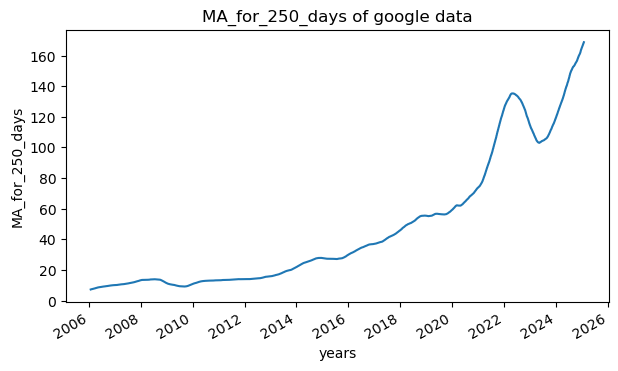

In [44]:
plot_graph((7,4), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

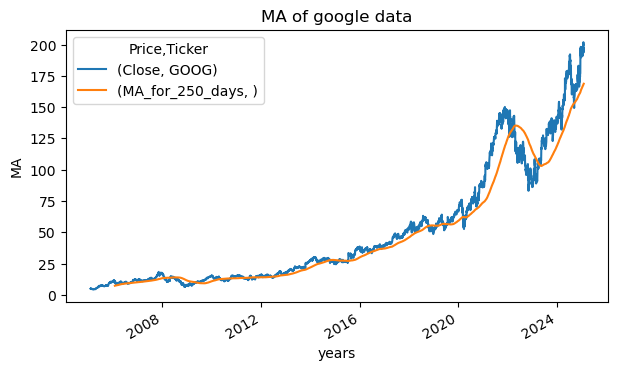

In [45]:
plot_graph((7,4), google_data[['Close','MA_for_250_days']],'MA')


<Figure size 640x480 with 0 Axes>

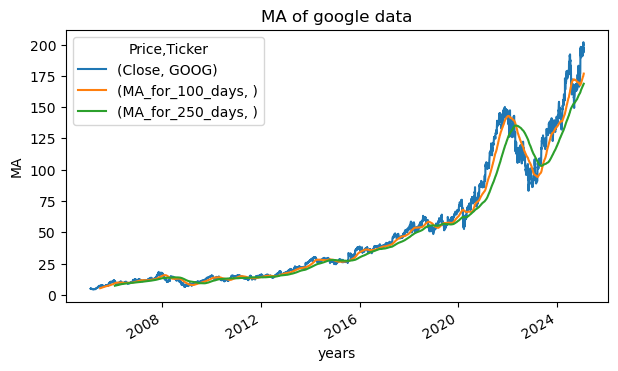

In [46]:
google_data['MA_for_100_days'] = google_data['Close'].rolling(100).mean()
plot_graph((7,4), google_data[['Close','MA_for_100_days','MA_for_250_days']],'MA')


In [47]:
google_data['percentage_change_cp'] = google_data['Close'].pct_change()
google_data[['Close','percentage_change_cp']].head()

Price,Close,percentage_change_cp
Ticker,GOOG,
Date,,
2005-01-31,4.854795,NaN
2005-02-01,4.762473,-0.019017
2005-02-02,5.111406,0.073267
2005-02-03,5.233012,0.023791
2005-02-04,5.071699,-0.030826


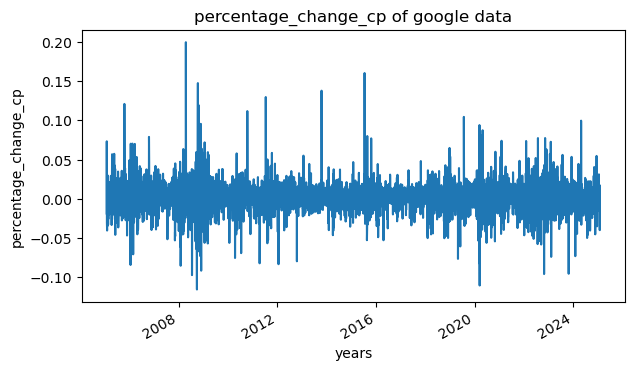

In [48]:
plot_graph((7,4), google_data['percentage_change_cp'], 'percentage_change_cp')

In [49]:
close_price = google_data[['Close']]

In [50]:
max(close_price.values), min(close_price.values)

(array([201.8999939]), array([4.34281063]))

In [51]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(close_price)
scaled_data

array([[0.00259157],
       [0.00212426],
       [0.0038905 ],
       ...,
       [0.95884741],
       [0.97555145],
       [0.97610818]])

In [52]:
len(scaled_data)

5032

In [53]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [54]:
x_data[0],y_data[0]

(array([[2.59157305e-03],
        [2.12425825e-03],
        [3.89049734e-03],
        [4.50604505e-03],
        [3.68950409e-03],
        [2.64307104e-03],
        [2.97094832e-03],
        [2.08406104e-03],
        [1.63182200e-03],
        [1.55895824e-03],
        [2.26118555e-03],
        [2.54257803e-03],
        [2.94205432e-03],
        [2.87798837e-03],
        [2.88426873e-03],
        [2.05767484e-03],
        [2.38178439e-03],
        [1.74613566e-03],
        [1.36675797e-03],
        [1.63307711e-03],
        [1.39062431e-03],
        [1.28008080e-03],
        [1.50996564e-03],
        [1.37052571e-03],
        [1.73608516e-03],
        [1.28258860e-03],
        [7.98947753e-04],
        [6.26846090e-04],
        [3.52991487e-04],
        [0.00000000e+00],
        [4.54746840e-04],
        [7.66266709e-05],
        [5.40166498e-04],
        [6.34381557e-04],
        [7.39909470e-04],
        [4.53489320e-04],
        [5.01224402e-04],
        [5.35143658e-04],
        [8.0

In [55]:

int(len(x_data)*0.7)

3452

In [56]:
5031-100-int(len(x_data)*0.7)

1479

In [57]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [58]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3452, 100, 1)
(3452, 1)
(1480, 100, 1)
(1480, 1)


In [59]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [60]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [61]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [62]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
3452/3452 ━━━━━━━━━━━━━━━━━━━━ 98s 28ms/step - loss: 1.6963e-04
Epoch 2/2
3452/3452 ━━━━━━━━━━━━━━━━━━━━ 95s 27ms/step - loss: 6.0466e-05


In [63]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [64]:
predictions = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


In [65]:
predictions

array([[0.2687777 ],
       [0.27110246],
       [0.27080888],
       ...,
       [0.9222862 ],
       [0.90376085],
       [0.9032927 ]], dtype=float32)

In [66]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 57.441776],
       [ 57.90105 ],
       [ 57.84305 ],
       ...,
       [186.54707 ],
       [182.88725 ],
       [182.79477 ]], dtype=float32)

In [67]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 59.45238113],
       [ 59.06527328],
       [ 59.01096344],
       ...,
       [193.77000427],
       [197.07000732],
       [197.17999268]])

In [68]:
rms = np.sqrt(np.mean((inv_predictions - inv_y_test)**2))

In [69]:
rms

5.139612081625981

In [70]:
plotting_data = pd.DataFrame(
    {
        'Orignal_test_data': inv_y_test.reshape(-1),
        'predictions': inv_predictions.reshape(-1)
    },
        index = google_data.index[splitting_len+100:]
)
plotting_data.head()

,Orignal_test_data,predictions
Date,,
2019-03-13,59.452381,57.441776
2019-03-14,59.065273,57.901051
2019-03-15,59.010963,57.843048
2019-03-18,59.001003,57.715359
2019-03-19,59.727894,57.660957


<Figure size 640x480 with 0 Axes>

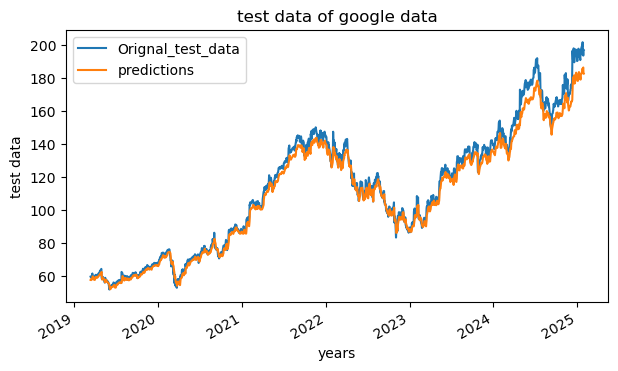

In [71]:
plot_graph((7,4), plotting_data, 'test data')

<Figure size 640x480 with 0 Axes>

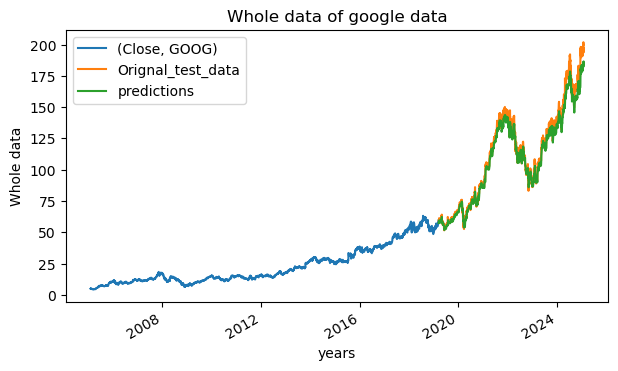

In [72]:
plot_graph((7,4), pd.concat([close_price[:splitting_len+100],plotting_data], axis=0), 'Whole data')

In [73]:
model.save("Arpits_stock_predictor_model.keras")